# Lab 5: Revisiting functions and Nearest Neighbors in Python

- **Author:** Li Zeng ([lizeng@uw.edu](mailto:lizeng@uw.edu))
- **Date:** 25 April 2016
- **Course:** INFO 371: Core Methods in Data Science

### Learning Objectives:
By the end of the lab, you will be able to:
* feel comfortable writing functions
* work comfortably with vector multiplication
* understand how nearest neighbors work
* implement logistic regression and nearest neighbors using scikit-learn package

### Topics:
1. Guidelines for writing functions
2. Vector multiplication
3. scikit-learn: Logistic regression
4. scikit-learn: Nearest neighbors

### References: 
 * [Scikit Learn Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html)
 * [Introduction to Statistical Learning, Lab #3](http://www-bcf.usc.edu/~gareth/ISL/Chapter%204%20Lab.txt)
 * [Vector multiplication](https://en.wikipedia.org/wiki/Multiplication_of_vectors)

In [1]:
import numpy as np
import pandas as pd

### 1. Revisiting functions

In [2]:
# function heading
def load_data(filename, print_flag = False):
    # function body
    # Given the filename, load the corresponding data
    
    path = "".join(['data/', filename, '.csv'])
    data = pd.read_csv(path)
    print " ".join([filename, "successfully loaded!"])
    
    if print_flag == True:
        print data.head(5)
    
    # return statement
    return data

In [3]:
auto_df = load_data("Auto")

Auto successfully loaded!


In [4]:
college_df = load_data("College")

College successfully loaded!


In [5]:
college_df = load_data("College", print_flag = True)

College successfully loaded!
                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio

** want to save more efforts? ** check [os.walk() method: a more manageble way to load data](http://www.tutorialspoint.com/python/os_walk.htm)

### 2. Vector multiplication

**Dot product** takes two vectors and returns a scalar quantity.

When a scalar multiplies a vector

In [6]:
v1 = [1,2,3,4]
s1 = 10
print np.dot(v1,s1)

[10 20 30 40]


1-D arrays to inner product of vectors

In [6]:
v1 = [1,2,3,4]
v2 = [5,6,7,8]

In [7]:
print np.dot(v1, v2)

70


2-D arrays: matrix multiplication

In [8]:
m1 = np.array([[1,2,3], [4,5,6]])
print m1.shape

(2, 3)


In [9]:
m2 = np.array([[1,1,1], [2,2,2]])
print m2.shape

(2, 3)


In [10]:
print np.dot(m1, m2)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [12]:
print m2.T
print m2.T.shape

[[1 2]
 [1 2]
 [1 2]]
(3, 2)


In [13]:
print np.dot(m1, m2.T)

[[ 6 12]
 [15 30]]


** get value of the dependent variable for a linear model **

$ y = \theta_1*x_1 + \theta_2*x_2,$ where $ \theta = (\theta_1, \theta_2) = (2,3) $

In [14]:
theta = np.array([[2,3]])
x1 = np.array([[10,100], [15,200], [5,80]])
np.dot(theta, x1.T)

array([[320, 630, 250]])

### Introduce Iris dataset

In [15]:
from sklearn import datasets

In [16]:
iris = datasets.load_iris()
#iris

In [17]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
iris_soe = iris.target_names

### 3. Logistic Regression

In [19]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

Explore more:
[sklearn.linear_model.LogisticRegression()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [20]:
# Let's choose two features: sepal length and sepal width
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
print logreg.predict([[5.5, 2.6]]), logreg.predict_proba([[5.5, 2.6]])
print logreg.predict([[7.1, 1.8]]), logreg.predict_proba([[7.1, 1.8]])

[1] [[ 0.10226338  0.46637085  0.43136577]]
[2] [[  1.14699402e-04   4.78574926e-01   5.21310375e-01]]


In [23]:
print logreg.score(X_test, y_test)

0.78


Let's plot decision boundary:

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

(1.5, 4.900000000000003)

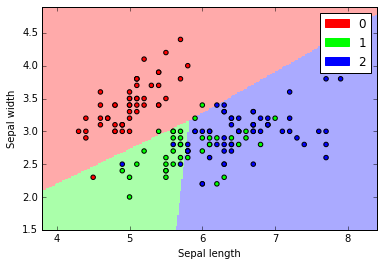

In [25]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# concatenate xx and yy
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

patch1 = mpatches.Patch(color='#FF0000', label='0')
patch2 = mpatches.Patch(color='#00FF00', label='1')
patch3 = mpatches.Patch(color='#0000FF', label='2')
ax.legend(loc = 'best', handles=[patch1, patch2, patch3])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

### 4. Nearest neighbors
[sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [26]:
from sklearn import neighbors
from sklearn.cross_validation import train_test_split

In [27]:
nneighbor = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', p=2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
nneighbor.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
print nneighbor.predict([[5.5, 2.6]]), nneighbor.predict_proba([[5.5, 2.6]])
print nneighbor.predict([[7.1, 1.8]]), nneighbor.predict_proba([[7.1, 1.8]])

[1] [[ 0.  1.  0.]]
[2] [[ 0.   0.4  0.6]]


In [29]:
print nneighbor.score(X_test, y_test)

0.78


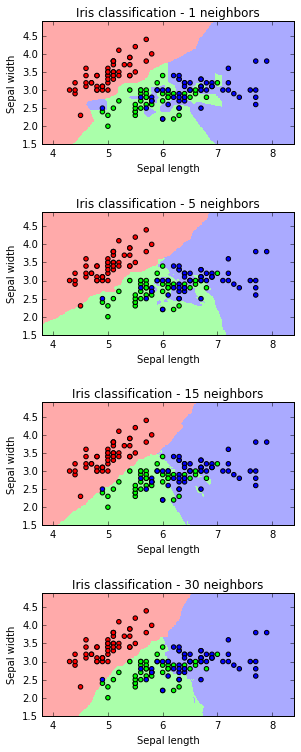

In [30]:
n_neighbors = [1,5,15,30]
fig, ax = plt.subplots(4, figsize= (4,10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

for i in range(len(n_neighbors)):
    nneighbor = neighbors.KNeighborsClassifier(n_neighbors[i])
    nneighbor.fit(X, y)
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # concatenate xx and yy
    Z = nneighbor.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    
    ax[i].pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax[i].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold)
    ax[i].set_xlabel('Sepal length')
    ax[i].set_ylabel('Sepal width')

    ax[i].set_xlim(xx.min(), xx.max())
    ax[i].set_ylim(yy.min(), yy.max())
    ax[i].set_title(" ".join(["Iris classification -", str(n_neighbors[i]), "neighbors"]))

### Exercise

Use petal length and petal width as features to classify different species of Iris flowers. Choose one of your favorite models from sklearn library. If you have more time, try to analyze the performance of the trained model.